In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Enable inline plotting
%matplotlib inline

plt.rcParams["figure.figsize"]=15,10 # changing the size of the graphs.

In [2]:
#Code: code for the battleground (not needed for analysis).
#Faction: faction of the player (Horde or Alliance).
#Class: class of the player (warrior, paladin, hunter, rogue, priest, death knight, shaman, mage, warlock, monk, druid, demon hunter).
#KB: number of mortal kills given by the player.
#D: number of times that the player died.
#HK: number of killings where the player or his/her group contributed.
#DD: damage done by the player.
#HD: healing done by the player.
#Honor: honor awarded to the player.
#Win: 1 if the player won.
#Lose: 1 if the player lost.
#Rol: dps if the player is a damage dealer; heal if the player is focused in healing allies. Note that not all classes can be healers, just shaman, paladin, priest, monk and druid, but all classes can be damage dealers.
#BE: some weeks there is a bonus event, when the honor gained is increased. 1 if the battleground happened during that week.

In [3]:
#AB: Arathi basin.
#BG: Battle for Gilneas.
#DG: Deepwind gorge.
#ES: Eye of the storm.
#SA: Strand of the ancients.
#SM: Silvershard mines.
#SS: Seething shore.
#TK: Temple of Kotmogu.
#TP: Twin peaks.
#WG: Warsong gulch.

In [ ]:
# To - do list
# Check the amount of honor based on the 'HK' = Honorable Kills
# and see if they have won or not based on the amount of honor gained.
# compare the stats from Temple of Kotmogu to Walsong Gulch to see the performance.
# Comparing heals & damage done from different classees & the battleground that they are in.

In [152]:
df = pd.read_csv('wowbgs.csv')
dfwg = pd.read_csv('wowwg.csv')
dftk = pd.read_csv('wowtk.csv')

In [47]:
df.head()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN


In [80]:
dfwg.head()

,Code,Faction,Class,KB,D,HK,DD,HD,FC,FR,Honor,Win,Lose,Rol,BE
0,WG1,Horde,Hunter,1,3,14,48155,6641,1.0,NaN,532,1.0,NaN,dps,NaN
1,WG1,Horde,Death Knight,1,3,12,27025,7106,NaN,NaN,377,1.0,NaN,dps,NaN
2,WG1,Alliance,Paladin,0,1,19,824,93879,NaN,NaN,252,NaN,1.0,heal,NaN
3,WG1,Alliance,Paladin,1,2,25,7046,98599,NaN,NaN,274,NaN,1.0,heal,NaN
4,WG1,Alliance,Rogue,2,3,23,65483,19629,NaN,NaN,268,NaN,1.0,dps,NaN


In [162]:
dftk.head()

,Code,Faction,Class,KB,D,HK,DD,HD,OP,VP,Honor,Win,Lose,Rol,BE
0,TK1,Alliance,Death Knight,6,3,58,25925,11314,4.0,444,554,1.0,NaN,dps,NaN
1,TK1,Alliance,Mage,6,2,57,28438,5258,1.0,120,251,1.0,NaN,dps,NaN
2,TK1,Alliance,Druid,8,3,55,45584,7932,NaN,80,547,1.0,NaN,dps,NaN
3,TK1,Alliance,Shaman,0,0,59,7664,54796,NaN,0,405,1.0,NaN,heal,NaN
4,TK1,Horde,Warrior,2,6,12,32693,7929,NaN,20,185,NaN,1.0,dps,NaN


<Figure size 1080x720 with 0 Axes>

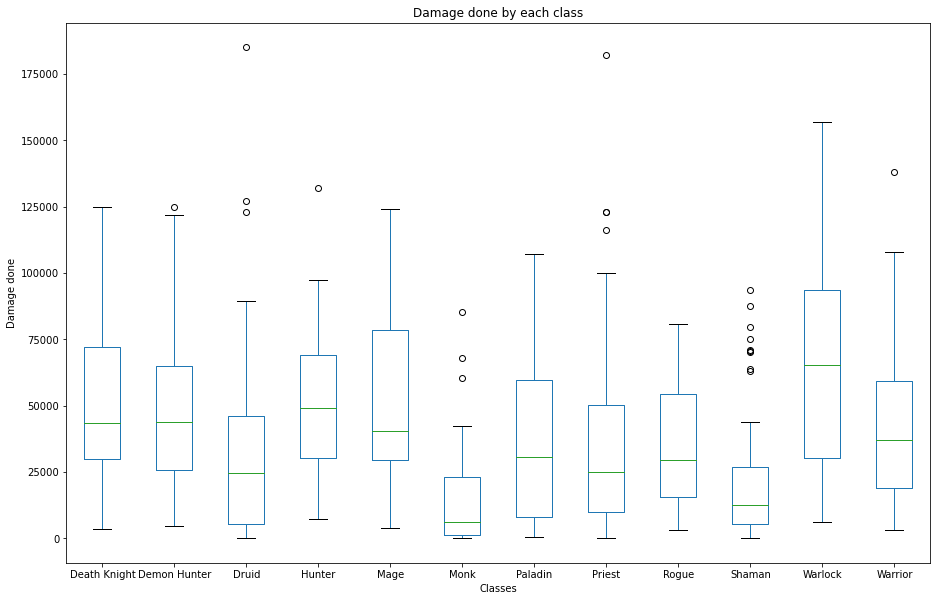

In [160]:
plt.figure()
dfwg.boxplot(column='DD', by='Class', grid=False)
plt.xlabel('Classes')
plt.ylabel('Damage done')
plt.suptitle("")
plt.title("Damage done by each class")
plt.show()
# Displaying the damange done by each player from each class in Warsong Gulch.

<Figure size 1080x720 with 0 Axes>

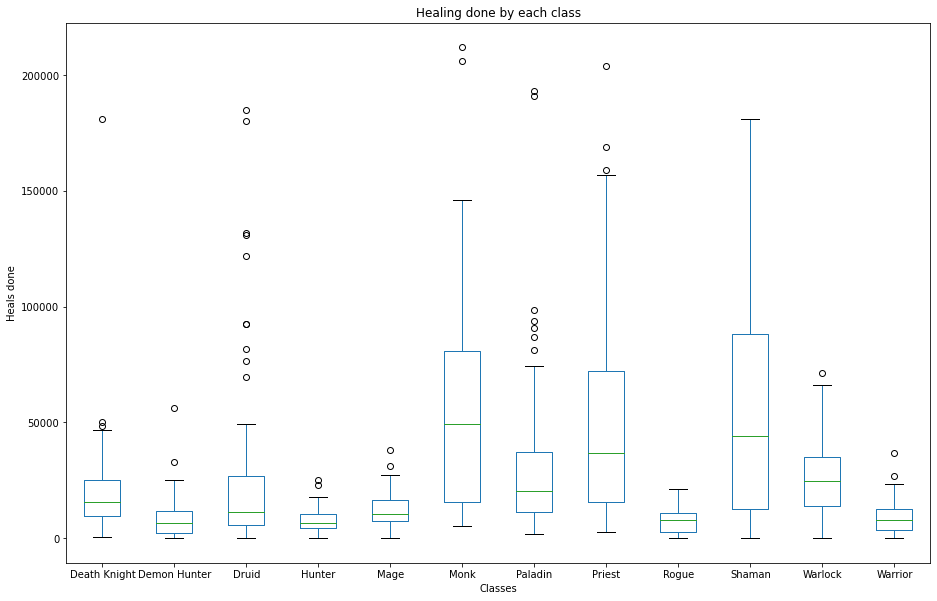

In [161]:
plt.figure()
dfwg.boxplot(column='HD', by='Class', grid=False)
plt.xlabel('Classes')
plt.ylabel('Heals done')
plt.suptitle("")
plt.title("Healing done by each class")
plt.show()

# Displaying the Heals done by each player from each class in Warsong Gulch.

In [67]:
df_paladin = df1[df1['Class']=='Paladin']


In [169]:
df_warrior = df1[df1['Class']=='Warrior']
dfwg_warrior = dfwg[dfwg['Class']=='Warrior']
dftk_warrior = dftk[dftk['Class']=='Warrior']

In [65]:
df_rogue = df1[df1['Class']=='Rogue']


In [64]:
df_hunter = df1[df1['Class']=='Hunter']


In [163]:
df_monk = df[df['Class'] == 'Monk']
dfwg_monk = dfwg[dfwg['Class']=='Monk']  # making sure we get the right class  
dftk_monk = dftk[dftk['Class']=='Monk']  # to make sure we get the correct amount of monks

In [127]:
x = df1.drop(['Faction','Honor','Code'], axis = 1)   # removing faction, honor and Code columns for now
print(x.head())
y = df1['DD']    # displaying the Damange done for the y outcome
print(y)

  Battleground         Class  KB  D  HK     DD     HD  Win  Lose   Rol  BE
0           WG        Hunter   1  3  14  48155   6641  1.0   NaN   dps NaN
1           WG  Death Knight   1  3  12  27025   7106  1.0   NaN   dps NaN
2           WG       Paladin   0  1  19    824  93879  NaN   1.0  heal NaN
3           WG       Paladin   1  2  25   7046  98599  NaN   1.0  heal NaN
4           WG         Rogue   2  3  23  65483  19629  NaN   1.0   dps NaN
0        48155
1        27025
2          824
3         7046
4        65483
         ...  
3721    123000
3722     13087
3723     57365
3724     44997
3725     85443
Name: DD, Length: 3726, dtype: int64


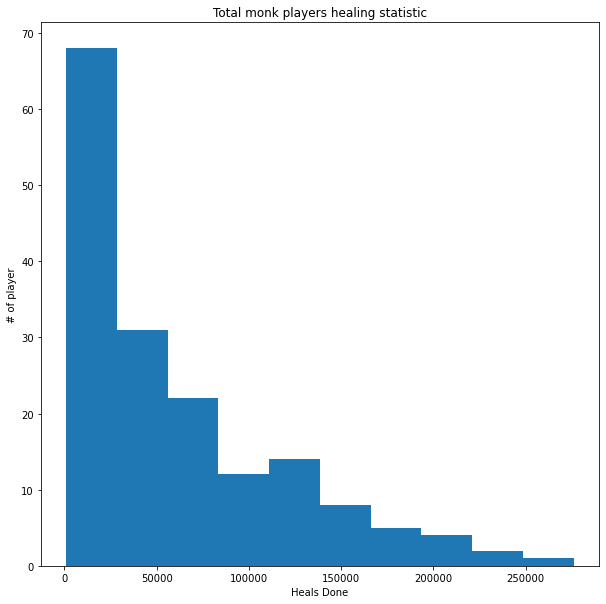

In [135]:
plt.figure()
df_monk['HD'].plot.hist()
plt.xlabel('Heals Done')
plt.ylabel('# of player')
plt.title('Total monk players healing statistic')
plt.show()

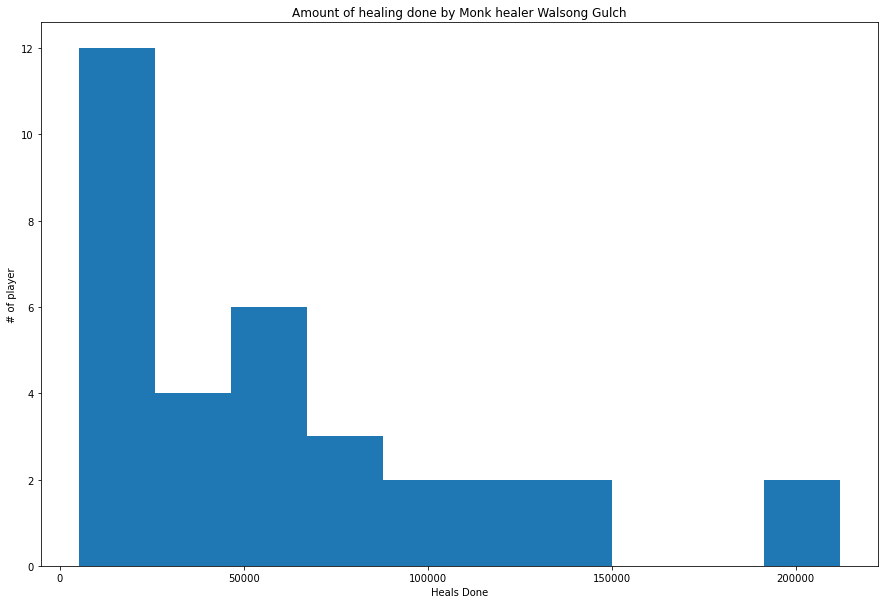

In [164]:
plt.figure()
dfwg_monk['HD'].plot.hist()
plt.xlabel('Heals Done')
plt.ylabel('# of player')
plt.title('Amount of healing done by Monk healer Walsong Gulch')
plt.show()                     # Based on the histogram, lots of players are sitting between 0 ~ 250,000
                                # This histogram is from dfwg

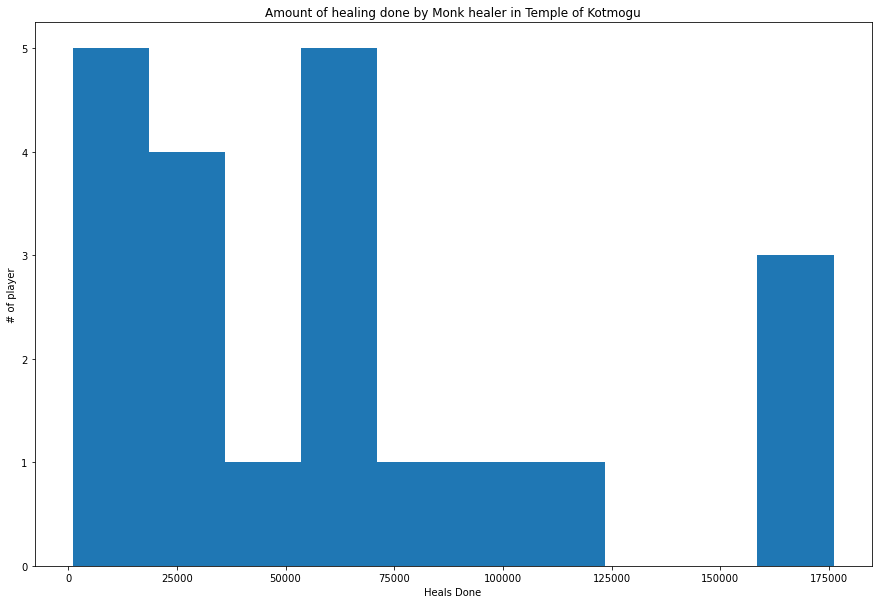

In [165]:
plt.figure()
dftk_monk['HD'].plot.hist()
plt.xlabel('Heals Done')
plt.ylabel('# of player')
plt.title('Amount of healing done by Monk healer in Temple of Kotmogu')
plt.show()

                        # this diagram shows wide range of heals done by players
                        # mostly, they are at 0 ~ 250,000 but decent amount of players sitting above 150,000

<Figure size 720x720 with 0 Axes>

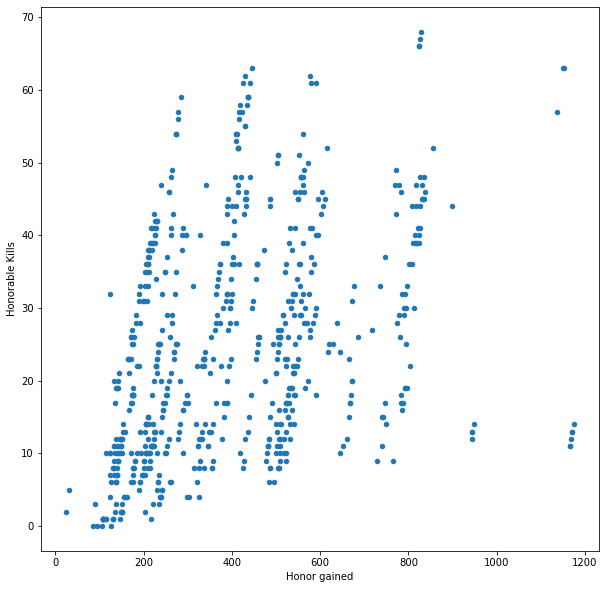

In [149]:
plt.figure()
dfwg.plot.scatter('Honor', 'HK')
plt.xlabel('Honor gained')
plt.ylabel('Honorable Kills')
plt.show()                     
# displays that High honorable kills doesn't mean high honor gained since it tells that few players with low honorable kills
# were able to reachieve high amount of honor. 

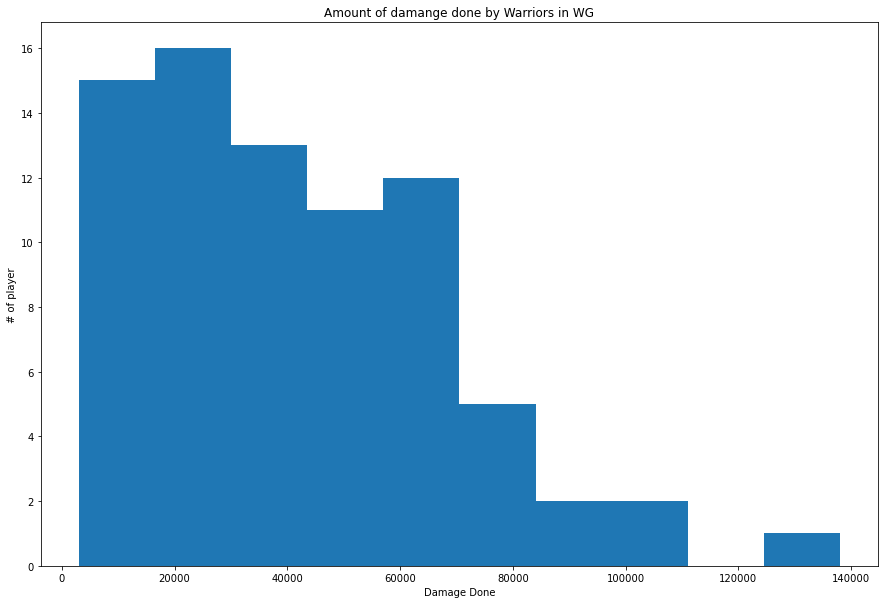

In [171]:
plt.figure()
dfwg_warrior['DD'].plot.hist()
plt.xlabel('Damage Done')
plt.ylabel('# of player')
plt.title('Amount of damange done by Warriors in WG')
plt.show()                        

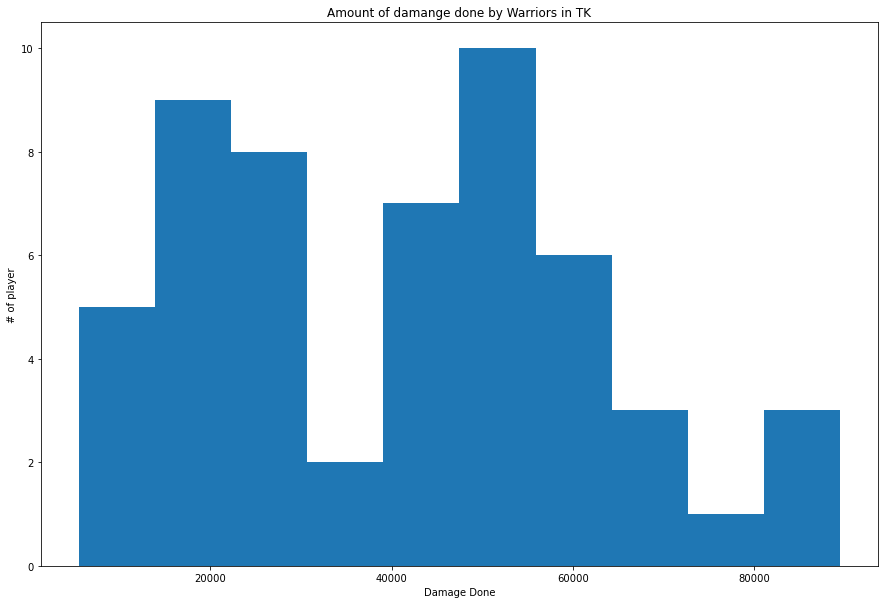

In [172]:
plt.figure()
dftk_warrior['DD'].plot.hist()
plt.xlabel('Damage Done')
plt.ylabel('# of player')
plt.title('Amount of damange done by Warriors in TK')
plt.show()    